## User Input

In [1]:
#Foldername that contains dhb and vhb
FolderName = '/Users/seetha/Desktop/Habenula_Variation/Data/Habenula_AF4_Blue_Redx3/Tiff/Registered/Sorted/Fish1254/'
FishName =  os.path.basename(os.path.normpath(FolderName))
#Stimulus on and off time
stimulus_on_time = [46, 86, 126, 166, 206, 246]
stimulus_off_time = [65, 106, 146, 186, 226, 266]
stimulus_train = ['Blue', 'Red','Blue', 'Red','Blue', 'Red']

#Baseline over which to normalize
time_baseline = [10, 30]

## Algorithm

### 1. Import Libraries and define functions to start thunder

In [2]:
# Start Thunder and get thunder constant
print 'Starting Thunder Now. Check console for details'
from thunder import ThunderContext

tsc = ThunderContext.start(appName="thunderpca")

Starting Thunder Now. Check console for details


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thunder import Colorize
import os
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
#Load functions for preprocessing first
import functions_for_preprocessing
reload(functions_for_preprocessing)
from functions_for_preprocessing import class_preprocess_data
analyze = class_preprocess_data(time_baseline, stimulus_on_time, stimulus_off_time)

In [5]:
filesep = os.path.sep
%matplotlib inline
sns.set_context('notebook', font_scale=1.5)
image = Colorize.image

In [6]:
#Create directory for Figures
Figure_PDFDirectory = FolderName + filesep + 'Figures' + filesep
if not os.path.exists(Figure_PDFDirectory):
    os.makedirs(Figure_PDFDirectory)

### 2. Load Data from vHb and dHb, preprocess and plot mean

In [ ]:
pp = PdfPages(Figure_PDFDirectory + FishName+'_Preprocessed_Data.pdf')

In [7]:
dHb_filename = os.path.join(FolderName, 'dHb') + filesep
vHb_filename = os.path.join(FolderName, 'vHb') + filesep

#Raise error if no such folder exists
if not(os.path.isdir(dHb_filename) or os.path.isdir(vHb_filename)):
    raise(ValueError('There are no folders containing dHb or vHb'))
    
data_dHb = analyze.load_and_preprocess_data(tsc, dHb_filename)
data_vHb = analyze.load_and_preprocess_data(tsc, vHb_filename)

In [33]:
#Get image of data
img_raw_dHb = data_dHb.pack()
img_raw_vHb = data_vHb.pack()

In [9]:
time_experiment = np.size(img_dHb,0)
print 'Time points in experiment..', time_experiment

Time points in experiment.. 285


In [10]:
# Get a small subset of data to check
examples_dHb = analyze.get_small_subset_for_plotting(data_dHb, number_samples=100, threshold=100)
examples_vHb = analyze.get_small_subset_for_plotting(data_vHb, number_samples=100, threshold=50)

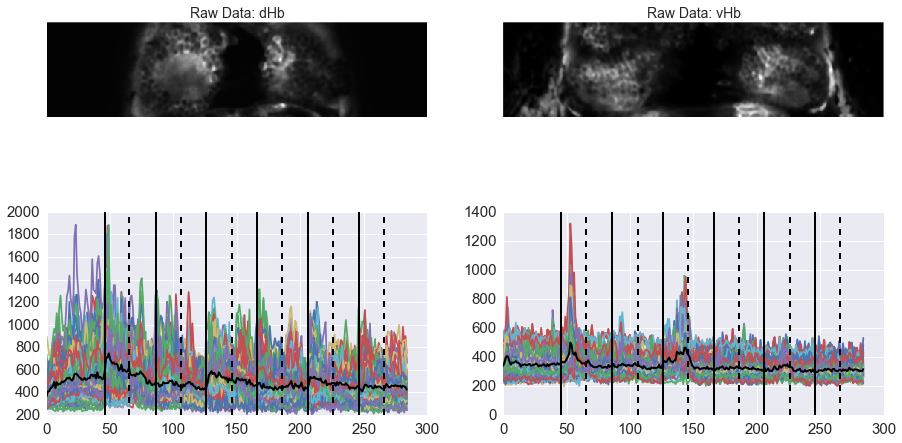

In [11]:
# Plot mean and traces of data and check whether to detrend or not
fig1 = plt.figure(figsize=(15,8))
analyze.plotimageplanes(fig1, np.mean(img_raw_dHb,0), plot_title='Raw Data: dHb', num_subplots=1)
analyze.plotimageplanes(fig1, np.mean(img_raw_vHb,0), plot_title='Raw Data: vHb', num_subplots=2)
analyze.plot_traces(fig1, examples_dHb, num_subplots=3)
analyze.plot_traces(fig1, examples_vHb, num_subplots=4)
plt.show()
pp.savefig(fig1)

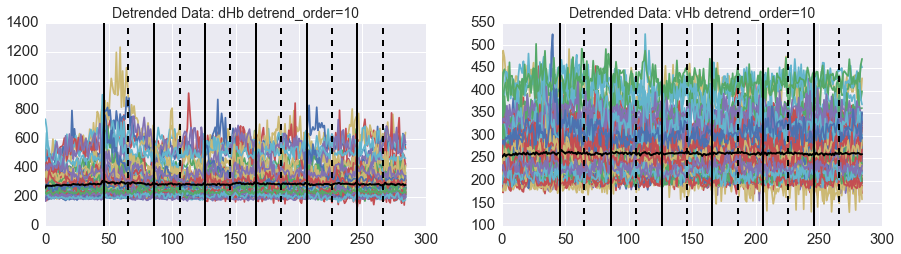

In [12]:
#Detrend if necessary
detrend_dHb = 1
detrend_vHb = 1
detrendorder_dHb = 10
detrendorder_vHb = 10

fig1 = plt.figure(figsize=(15,8))
if detrend_dHb:
    data_dHb = analyze.detrend_data(data_dHb, detrend_order=detrendorder_dHb)
    data_dHb.cache()
    examples_dHb = analyze.get_small_subset_for_plotting(data_dHb, number_samples=100, threshold=10)
    analyze.plot_traces(fig1, examples_dHb, num_subplots=1, \
                        plot_title='Detrended Data: dHb ' + \
                        'detrend_order=' + str(detrendorder_dHb) )
    
if detrend_vHb:
    data_vHb = analyze.detrend_data(data_vHb, detrend_order=detrendorder_vHb)
    data_vHb.cache()
    examples_vHb = analyze.get_small_subset_for_plotting(data_vHb, number_samples=100, threshold=10)
    analyze.plot_traces(fig1, examples_vHb, num_subplots=2, \
                        plot_title='Detrended Data: vHb ' + \
                        'detrend_order=' + str(detrendorder_vHb))

plt.show()
pp.savefig(fig1)

In [ ]:
pp.close()

### 3. Normalize data and plot

In [ ]:
pp = PdfPages(Figure_PDFDirectory + FishName +'_Normalized_smoothed.pdf')

In [13]:
# Get zscore of data
zscore_dHb = analyze.normalize(data_dHb, squelch_parameter=200)
zscore_vHb = analyze.normalize(data_vHb, squelch_parameter=200)

Baseline being used for normalizing is ... 10  to  30
Baseline being used for normalizing is ... 10  to  30


In [14]:
# Get subset for plotting
examples_dHb = analyze.get_small_subset_for_plotting(zscore_dHb, number_samples=100, threshold=5)
examples_vHb = analyze.get_small_subset_for_plotting(zscore_vHb, number_samples=100, threshold=2)

In [15]:
# Get image of zscore
img_dHb = zscore_dHb.pack()
img_vHb = zscore_vHb.pack()

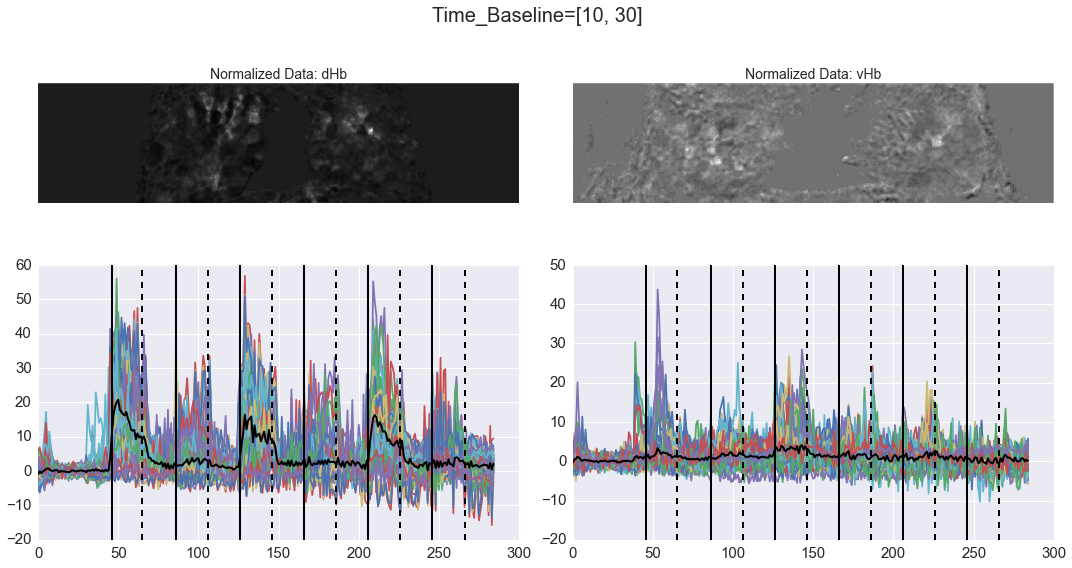

In [16]:
fig1 = plt.figure(figsize=(15,8))
analyze.plotimageplanes(fig1, np.mean(img_dHb,0),  plot_title='Normalized Data: dHb', num_subplots=1)
analyze.plotimageplanes(fig1, np.mean(img_vHb,0), plot_title='Normalized Data: vHb', num_subplots=2)
analyze.plot_traces(fig1, examples_dHb, num_subplots=3)
analyze.plot_traces(fig1, examples_vHb, num_subplots=4)
plt.suptitle('Time_Baseline='+str(time_baseline), fontsize=20)
plt.tight_layout()
plt.show()
pp.savefig(fig1)

In [17]:
# Smooth data if necessary and plot
smooth = 1
windowlen_dHb = 10
windowlen_vHb = 14

if smooth:
    zscore_dHb_smooth = zscore_dHb.applyValues(lambda x: analyze.smooth_func(x, window_len=windowlen_dHb), keepIndex=True)
    zscore_dHb_smooth.cache()
    examples_dHb = analyze.get_small_subset_for_plotting(zscore_dHb_smooth, number_samples=100, threshold=5)
    
    zscore_vHb_smooth = zscore_vHb.applyValues(lambda x: analyze.smooth_func(x, window_len=windowlen_vHb), keepIndex=True)
    zscore_vHb_smooth.cache()
    examples_vHb = analyze.get_small_subset_for_plotting(zscore_vHb_smooth, number_samples=100, threshold=2)

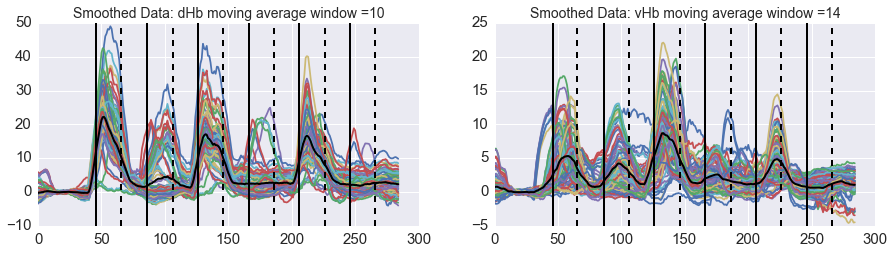

In [18]:
if smooth:
    
    fig1 = plt.figure(figsize=(15,8))
    analyze.plot_traces(fig1, examples_dHb, num_subplots=1, \
                       plot_title='Smoothed Data: dHb ' + \
                        'moving average window =' + str(windowlen_dHb))
    analyze.plot_traces(fig1, examples_vHb, num_subplots=2, \
                       plot_title='Smoothed Data: vHb ' + \
                        'moving average window =' + str(windowlen_vHb))
    plt.show()

    pp.savefig(fig1)

### Use standard deviation to threshold data if necessary

In [19]:
do_std = 0
if do_std:
    stdMap_dHb = zscore_dHb.seriesStdev().pack()
    stdMap_vHb = zscore_vHb.seriesStdev().pack()
    
    threshold_dHb = 1
    threshold_vHb = 1
    
    fig1 = plt.figure(figsize=(15,8))
    analyze.plotimageplanes(fig1, stdMap_dHb>threshold ,\
                            plot_title='Standard_Deviation: dHb ' + \
                            'threshold =' + str(threshold_dHb),\
                            num_subplots=1)
    analyze.plotimageplanes(fig1, stdMap_vHb>threshold,\
                            plot_title='Standard_Deviation: dHb ' + \
                            'threshold =' + str(threshold_dHb),\
                            num_subplots=2)
    
    filtered_dHb = zscore_dHb.filterOnValues(lambda x: np.std(x) > threshold)
    filtered_vHb = zscore_vHb.filterOnValues(lambda x: np.std(x) > threshold)
    
    plt.show()
    pp.savefig(fig1)

In [ ]:
pp.close()

### 4. Perform KMeans

In [ ]:
pp = PdfPages(Figure_PDFDirectory + FishName + '_KMeans.pdf')

In [25]:
#Kmeans_Parameters
kmeans_clusters_dHb = 8
kmeans_clusters_vHb = 8
kmeans_data_dHb = zscore_dHb_smooth
kmeans_data_vHb = zscore_vHb_smooth

In [42]:
#Load functions for kmeans 
import functions_for_kmeans
reload(functions_for_kmeans)
from functions_for_kmeans import class_kmeans
kmeans_dHb = class_kmeans(kmeans_clusters_dHb, kmeans_data_dHb, img_raw_dHb, stimulus_on_time, stimulus_off_time)
kmeans_vHb = class_kmeans(kmeans_clusters_vHb, kmeans_data_vHb, img_raw_vHb, stimulus_on_time, stimulus_off_time)

In [26]:
# Perform kmeans
model_dHb, img_sim_dHb, img_labels_dHb = kmeans_dHb.run_kmeans()
model_vHb, img_sim_vHb, img_labels_vHb = kmeans_vHb.run_kmeans()

In [27]:
kmeans_clusters_dHb = model_dHb.centers.T
kmeans_clusters_vHb = model_vHb.centers.T

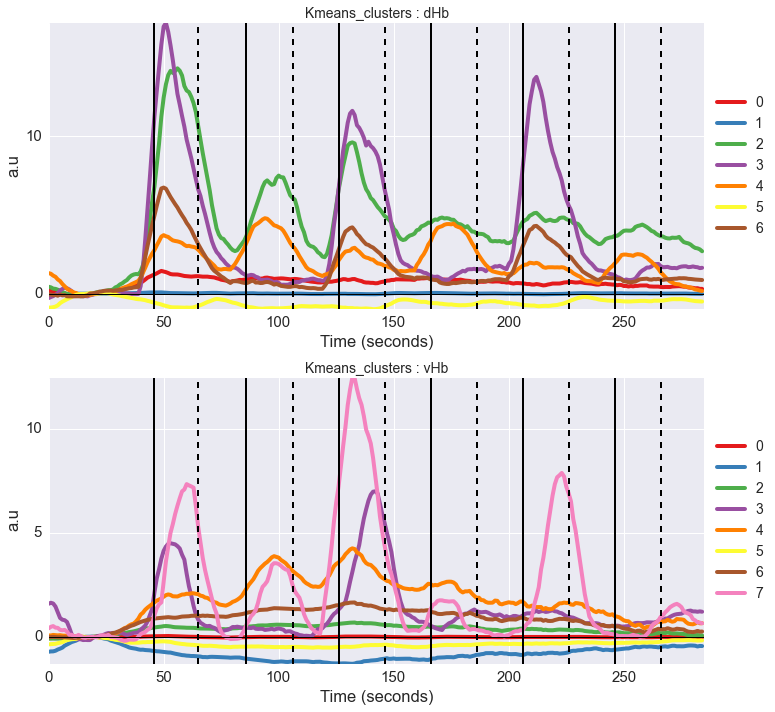

In [28]:
#Check plots with a random colormap
fig1 = plt.figure(figsize=(10,10))
gs = plt.GridSpec(2, 2, width_ratios=[1,0.2])
cmapCat = ListedColormap(sns.color_palette("Set1", n_colors=8), name='from_list')
kmeans_dHb.plot_kmeans_components(fig1, gs, kmeans_clusters_dHb, cmapCat.colors,\
                                  plot_title='Kmeans_clusters : dHb',
                                  num_subplots=1, gridspecs='[0,0]')
kmeans_vHb.plot_kmeans_components(fig1, gs, kmeans_clusters_vHb, cmapCat.colors,\
                                  plot_title='Kmeans_clusters : vHb',
                                  num_subplots=2, gridspecs='[1,0]')
plt.tight_layout()
plt.show()

In [29]:
#remove noisy clusters and replot
ignore_clusters_dHb = [0, 1];
ignore_clusters_vHb = [0, 1,2,5,6];

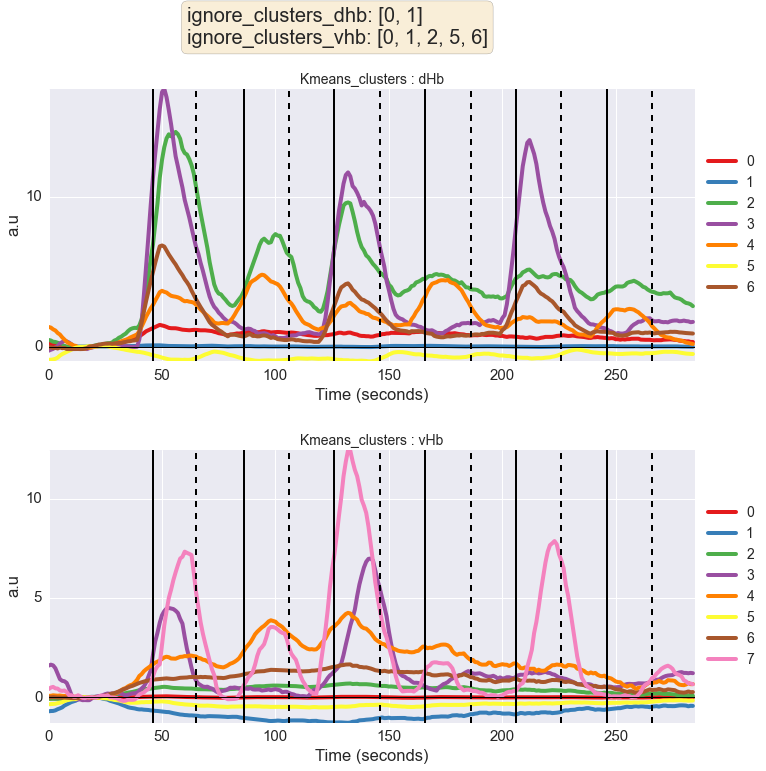

In [30]:
#Check plots with a random colormap
fig1 = plt.figure(figsize=(10,10))
gs = plt.GridSpec(2, 2, width_ratios=[1,0.2])
plt.ioff()
cmapCat = ListedColormap(sns.color_palette("Set1", n_colors=8), name='from_list')
kmeans_dHb.plot_kmeans_components(fig1, gs, kmeans_clusters_dHb, cmapCat.colors,\
                                  plot_title='Kmeans_clusters : dHb',
                                  num_subplots=1, gridspecs='[0,0]')
kmeans_vHb.plot_kmeans_components(fig1, gs, kmeans_clusters_vHb, cmapCat.colors,\
                                  plot_title='Kmeans_clusters : vHb',
                                  num_subplots=2, gridspecs='[1,0]')

txtstr = 'ignore_clusters_dhb: ' + str(ignore_clusters_dHb) +\
'\nignore_clusters_vhb: ' + str(ignore_clusters_vHb) 

ax1 = fig1.add_subplot(gs[0,1])
plt.axis('off')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(-4, 1.3, txtstr, transform=ax1.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.tight_layout()
pp.savefig(fig1)

In [49]:
#Use a colorbrewer colormap to create map of brain
brainmap_dHb, unique_clrs_dHb, newclrs_updated_rgb_dHb, newclrs_updated_brewer_dHb, matched_pixels_dHb, \
kmeans_clusters_updated_dHb = kmeans_dHb.make_kmeans_maps(kmeans_clusters_dHb, \
                                                          img_labels_dHb, img_sim_dHb, mixing_parameter=1.0,
                                                          std_threshold=0.0005, ignore_clusters=ignore_clusters_dHb)
    
brainmap_vHb, unique_clrs_vHb, newclrs_updated_rgb_vHb, newclrs_updated_brewer_vHb, matched_pixels_vHb, \
kmeans_clusters_updated_vHb = kmeans_vHb.make_kmeans_maps(kmeans_clusters_vHb, \
                                                          img_labels_vHb, img_sim_vHb, mixing_parameter=0.8,\
                                                          std_threshold=0.0005, ignore_clusters=ignore_clusters_vHb)

Standard deviation of clusters is.. [ 0.31512454  0.02702308  2.99869239  4.12982259  1.21813199  0.25872688
  1.51293305]
Interesting clusters after STD are.. [[0 1 2 3 4 5 6]]
Interesting clusters after user specified clusters.. [2 3 4 5 6]
Standard deviation of clusters is.. [ 0.01633084  0.3204294   0.1966614   1.42434686  1.07625879  0.12652282
  0.45857096  2.88575411]
Interesting clusters after STD are.. [[0 1 2 3 4 5 6 7]]
Interesting clusters after user specified clusters.. [3 4 7]


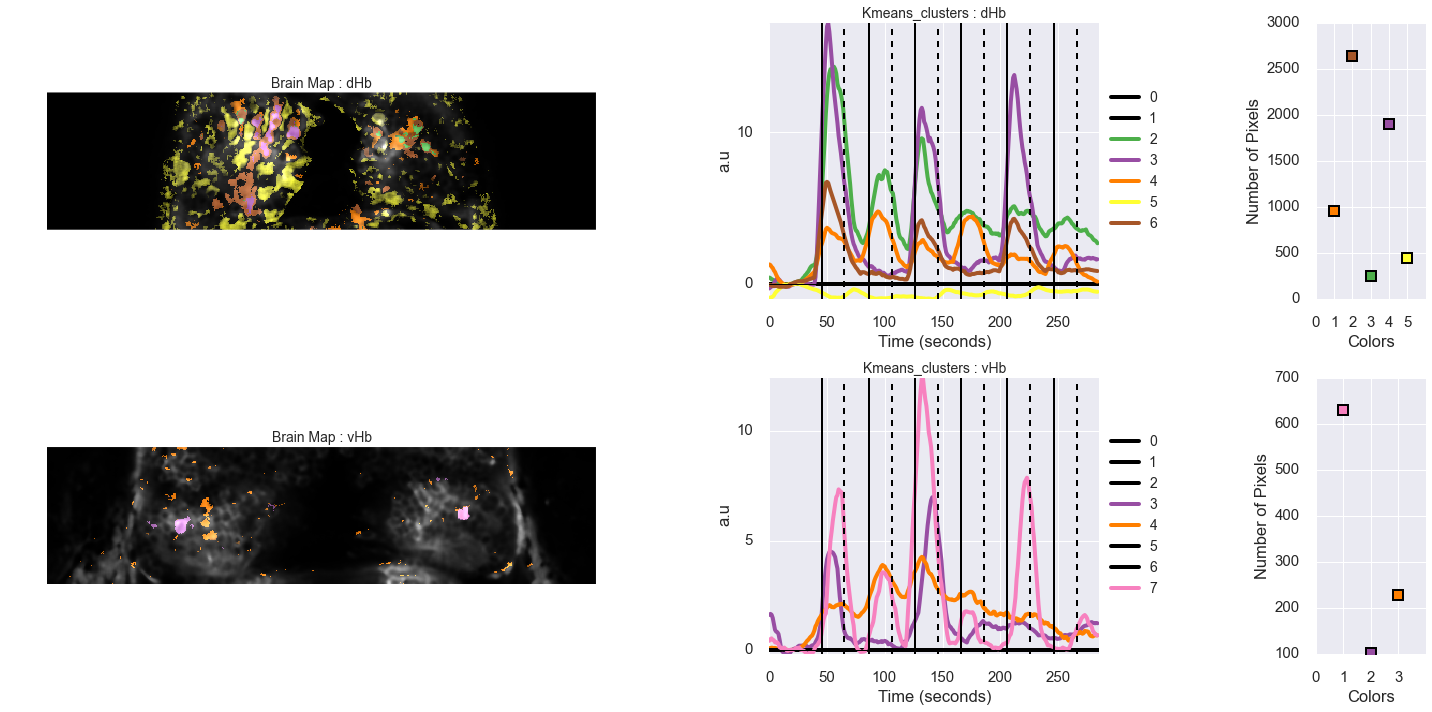

In [50]:
fig1 = plt.figure(figsize=(20,10))
gs = plt.GridSpec(2,5,width_ratios=[5,0.1,3,0.5,1])
kmeans_dHb.plotimageplanes(fig1, gs, brainmap_dHb , plot_title='Brain Map : dHb', gridspecs='[0,0]')
kmeans_vHb.plotimageplanes(fig1, gs, brainmap_vHb, plot_title='Brain Map : vHb', gridspecs='[1,0]')

kmeans_dHb.plot_kmeans_components(fig1, gs, kmeans_clusters_updated_dHb, newclrs_updated_brewer_dHb.colors,\
                                  plot_title='Kmeans_clusters : dHb', num_subplots=2, flag_separate=0, gridspecs='[0,2]')
kmeans_vHb.plot_kmeans_components(fig1, gs, kmeans_clusters_updated_vHb, newclrs_updated_brewer_vHb.colors, \
                                  plot_title='Kmeans_clusters : vHb', num_subplots=4, flag_separate=0, gridspecs='[1,2]')

kmeans_dHb.plot_matchedpixels(fig1, gs, matched_pixels_dHb, unique_clrs_dHb, gridspecs='[0,4]')
kmeans_vHb.plot_matchedpixels(fig1, gs, matched_pixels_vHb, unique_clrs_vHb, gridspecs='[1,4]')

plt.tight_layout()
plt.show()
pp.savefig(fig1)

### Run PCA

In [ ]:
pp = PdfPages(Figure_PDFDirectory + FishName + '_PCA.pdf')

In [ ]:
PCA_data_dHb = zscore_dHb_smooth
PCA_data_vHb = zscore_vHb_smooth

In [ ]:
# PCA parameters 
pca_components = 4  # Number of pca components to detect from files
num_pca_colors = 50  # Number of colors on the pca maps
num_samples = 10000  # number of random samples to select to do PCA reconstruction
thresh_pca = 0.001  # Threshold above which to plot the pca components
color_map = "polar"

#Color to plot each trial
color_mat = ['#00FFFF', '#FF0000', '#0000FF', '#FF1493', '#3090C7', '#800000']

In [ ]:
#Load functions for kmeans 
import functions_for_PCA
reload(functions_for_PCA)
from functions_for_PCA import class_PCA
PCA_dHb = class_PCA(pca_components, PCA_data_dHb, img_raw_dHb, num_pca_colors, num_samples,\
                    thresh_pca, color_map, color_mat,stimulus_on_time, stimulus_off_time)
PCA_vHb = class_PCA(pca_components, PCA_data_vHb, img_raw_vHb, num_pca_colors, num_samples,\
                    thresh_pca, color_map, color_mat,stimulus_on_time, stimulus_off_time)

In [ ]:
#Run PCA
required_pcs_dHb = [0, 1, 2]
required_pcs_vHb = [0, 1, 2]

In [ ]:
model_dHb, imgs_dHb = PCA_dHb.run_pca(required_pcs_dHb)
model_vHb, imgs_vHb = PCA_vHb.run_pca(required_pcs_vHb)

In [ ]:
maps_dHb, pts_dHb, clrs_dHb, recon_dHb, unique_clrs_PCA_dHb, matched_pixels_PCA_dHb, \
               matched_signals_dHb = PCA_dHb.make_pca_maps(model_dHb, imgs_dHb, \
                                                       required_pcs_dHb)
    
maps_vHb, pts_vHb, clrs_vHb, recon_vHb, unique_clrs_PCA_vHb, matched_pixels_PCA_vHb, \
               matched_signals_vHb = PCA_dHb.make_pca_maps(model_vHb, imgs_vHb, \
                                                       required_pcs_dHb)

In [ ]:
pca_components_dHb = model_dHb.comps.T
pca_components_vHb = model_vHb.comps.T
pca_eigenvalues_dHb = model_dHb.latent
pca_eigenvalues_vHb = model_vHb.latent

In [ ]:
fig1 = plt.figure(figsize=(10,10))

gs = plt.GridSpec(3,5, height_ratios=[0.25,0.25,1], width_ratios=[0.5,1.5,0.25, 0.5,1.5])
PCA_dHb.plot_pca_components(fig1, gs, pca_components_dHb, required_pcs_dHb, plot_title='PCA components : dHb', gridspecs='[0,0:2]')
PCA_vHb.plot_pca_components(fig1, gs, pca_components_vHb, required_pcs_vHb, plot_title='PCA components : vHb', gridspecs='[0,3:]')

PCA_dHb.plot_eigenvalues(fig1, gs, pca_eigenvalues_dHb, gridspecs='[1, 0:2]')
PCA_vHb.plot_eigenvalues(fig1, gs, pca_eigenvalues_vHb, gridspecs='[1, 3:]')

PCA_dHb.plot_stimulus_in_3d(fig1, gs, pca_components_dHb, required_pcs_dHb, 'z', gridspecs='[2,0:2]')
PCA_vHb.plot_stimulus_in_3d(fig1, gs, pca_components_vHb, required_pcs_vHb, 'z', gridspecs='[2,3:]')

plt.tight_layout()
plt.show()
pp.savefig(fig1)

In [ ]:
fig1 = plt.figure(figsize=(20,10))
gs = plt.GridSpec(2,5,width_ratios=[5,0.2,3,0.5,1])
PCA_dHb.plotimageplanes(fig1, gs, maps_dHb , plot_title='PCA map: dHb',\
                        gridspecs='[0,0]')
PCA_vHb.plotimageplanes(fig1, gs, maps_vHb, plot_title='PCA map: vHb',\
                        gridspecs='[1,0]')

PCA_dHb.plot_scores(fig1, gs, matched_signals_dHb, unique_clrs_PCA_dHb, plot_title='PCA scores : dHb', gridspecs='[0,2]')
PCA_vHb.plot_scores(fig1, gs, matched_signals_vHb, unique_clrs_PCA_vHb, plot_title='PCA scores : vHb', gridspecs='[1,2]')

PCA_dHb.plot_matchedpixels(fig1, gs, matched_pixels_PCA_dHb, unique_clrs_PCA_dHb, gridspecs='[0,4]')
PCA_vHb.plot_matchedpixels(fig1, gs, matched_pixels_PCA_vHb, unique_clrs_PCA_vHb, gridspecs='[1,4]')

plt.tight_layout()
plt.show()
pp.savefig(fig1)

### Regression

In [ ]:
pp = PdfPages(Figure_PDFDirectory + FishName + '_Regression.pdf')

In [ ]:
regression_data_dHb = data_dHb
regression_data_vHb = data_vHb

In [ ]:
#Load functions for regression
import functions_for_regression
reload(functions_for_regression)
from functions_for_regression import class_regression
regression_dHb = class_regression(regression_data_dHb, img_raw_dHb, time_experiment, stimulus_on_time, stimulus_off_time, stimulus_train)
regression_vHb = class_regression(regression_data_vHb, img_raw_vHb, time_experiment, stimulus_on_time, stimulus_off_time, stimulus_train)

In [ ]:
# Get regressors
amplitude_for_stimulus_train = 5
smooth_window_length = 10
fig1 = plt.figure(figsize=(5, 4))
regressors, regressorlist = regression_dHb.create_regression_parameters(fig1, amplitude_for_stimulus_train, smooth_window_length, plot_flag=1)
plt.tight_layout()
plt.show()
pp.savefig(fig1)

In [ ]:
# Plot correlation coefficient with regressors for dhb and vhb seperately
fig1 = plt.figure(figsize=(15,10))
A = list(np.ones(4))
A.append(0.15)
A = np.array(A)

gs = plt.GridSpec(len(regressors)+1, 2, height_ratios=A)

corrMat_dHb = np.zeros((np.size(img_dHb,1),np.size(img_dHb,2),len(regressors)))
corrMat_vHb = np.zeros((np.size(img_vHb,1),np.size(img_vHb,2),len(regressors)))

count = 0
for key, value in regressors.iteritems():
    
    if count == len(regressors)-1:
        colorbar = True
    else:
        colorbar = False
        
    corrMat_dHb[:,:,count] = regression_dHb.plot_correlation_with_regressors(fig1, gs, key, value, gridspecs='['+ str(count)+',0]',
                                        color_bar=colorbar, region='dHb', clim=[-0.5, 0.5])
    
    corrMat_vHb[:,:,count] = regression_vHb.plot_correlation_with_regressors(fig1, gs, key, value, gridspecs='['+ str(count)+',1]',
                                        color_bar=colorbar, region='vHb', clim=[-0.5, 0.5])
    
    count += 1

plt.suptitle('Correlation Coefficients with regressors')
plt.tight_layout()
plt.show()
pp.savefig(fig1)

In [ ]:
regression_results_dHb, betas_dHb, rsq_dHb = regression_dHb.perform_regression(regressorlist)
regression_results_vHb, betas_vHb, rsq_vHb = regression_vHb.perform_regression(regressorlist)

In [ ]:
#Plot r-squared
fig1 = plt.figure(figsize=(15,10))
gs = plt.GridSpec(1, 2)

regression_dHb.plotimageplanes(fig1, gs, rsq_dHb, cmap = 'gray', color_bar=True, plot_title='Rsquare: dHb', gridspecs='[0,0]')
regression_vHb.plotimageplanes(fig1, gs, rsq_vHb, cmap = 'gray', color_bar=True, plot_title='Rsquare: vHb', gridspecs='[0,1]')

plt.tight_layout()
plt.show()
pp.savefig(fig1)

In [ ]:
# plot betas seperately
fig1 = plt.figure(figsize=(20 ,5))
gs = plt.GridSpec(2, len(regressors))
for ii in xrange(0, len(regressors)):
    b1map = regression_dHb.center(betas_dHb[ii,:,:])
    regression_dHb.plotimageplanes(fig1, gs, b1map, cmap = 'seismic', color_bar=False, plot_title='Betas dHb: '+regressors.keys()[ii],\
                                   gridspecs='[0,'+str(ii)+']', clim=[-0.5, 0.5])
    
    
    if count == len(regressors)-1:
        colorbar = True
    else:
        colorbar = False
        
    b1map = regression_dHb.center(betas_vHb[ii,:,:])
    regression_vHb.plotimageplanes(fig1, gs, b1map, cmap = 'seismic', color_bar=colorbar, plot_title='Betas vHb: '+regressors.keys()[ii],\
                                   gridspecs='[1,'+str(ii)+']', clim=[-0.5, 0.5])
plt.show()
pp.savefig(fig1)

In [ ]:
# Plot regressors as an RGB on the habenula mean image plane - dHb
colors = ['aqua', 'green', 'deeppink', 'orange' ]
fig1 = plt.figure(figsize=(20 ,5))
gs = plt.GridSpec(4, len(regressors))

regression_dHb.plot_regressors_as_RGB(fig1, gs, regressors, rsq_dHb, betas_dHb, colors, brightness_scale=5)

plt.show()
pp.savefig(fig1)

In [ ]:
# Plot regressors as an RGB on the habenula mean image plane - vHb
colors = ['aqua', 'green', 'deeppink', 'orange' ]
fig1 = plt.figure(figsize=(20 ,5))
gs = plt.GridSpec(4, len(regressors))

regression_vHb.plot_regressors_as_RGB(fig1, gs, regressors, rsq_vHb, betas_vHb, colors, brightness_scale=10)

plt.show()
pp.savefig(fig1)

In [ ]:
# Plot regressors of vHb and dHb side by side
colors = ['aqua', 'green', 'deeppink', 'orange' ]
fig1 = plt.figure(figsize=(20 ,10))
gs = plt.GridSpec(2, 4, height_ratios=[1,0.08])

regression_dHb.plot_all_together_inseperateplot(fig1, gs, regressors, rsq_dHb, betas_dHb,\
                                      colors, brightness_scale=5, gridspecs='[0,0:2]')
regression_vHb.plot_all_together_inseperateplot(fig1, gs, regressors, rsq_vHb, betas_vHb,\
                                      colors, brightness_scale=5, gridspecs='[0,2:4]')
ax1 = fig1.add_subplot(gs[1, 0:1])
regression_dHb.create_colorbar(ax1, regressors, colors)
plt.tight_layout()
pp.savefig(fig1)

In [ ]:
pp.close()